# Assignment 6

In [21]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


##  Loading the dataset

In [22]:

df = pd.read_csv("heart.csv")

df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##  Identifing and handling the missing values

In [23]:

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

for column in df.columns:
    if df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        df[column].fillna(df[column].median(), inplace=True)


Missing values per column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


##  Removing the duplicate entries

<Axes: >

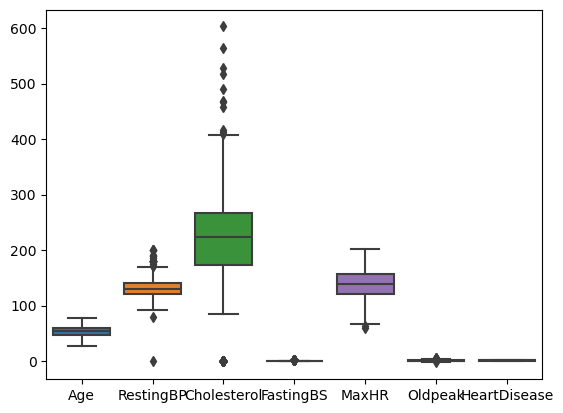

In [24]:
sns.boxplot(df)


##  Handling outliers using IQR

In [25]:

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


##  Error correction for specific column values

In [26]:

df['RestingBP'] = np.where(df['RestingBP'] == 0, df['RestingBP'].median(), df['RestingBP'])
df['Cholesterol'] = np.where(df['Cholesterol'] == 0, df['Cholesterol'].median(), df['Cholesterol'])


In [27]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.0,918.000000,918.000000,918.000000
mean,53.510893,132.125272,203.985158,0.0,136.819172,0.877778,0.553377
std,9.432617,16.993314,95.922341,0.0,25.432057,1.031693,0.497414
min,28.000000,90.000000,32.625000,0.0,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,173.250000,0.0,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.0,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.0,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,0.0,202.000000,3.750000,1.000000


<Axes: >

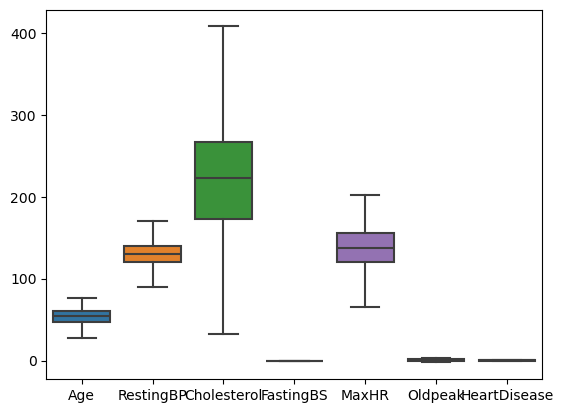

In [28]:
sns.boxplot(df)

## Verify data consistency

In [29]:

print("Data types and non-null counts:\n", df.info())
print("\nStatistical summary:\n", df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    float64
dtypes: float64(7), object(5)
memory usage: 86.2+ KB
Data types and non-null counts:
 None

Statistical summary:
                Age  Sex ChestPainType   RestingBP  Cholesterol  FastingBS  \
count   918.000000  918           918  918.000000   918.000000      918.0 